# Evaluating an ML Model

In [1]:
import numpy as np
import pandas as pd

## Classification Model Evaluation Metrics
The ones we're going to cover:
1. Basic accuracy method
3. Area under ROC Curve
4. Confusion Matrix
5. Classification Report

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 0. Split Data and Fit Model

In [2]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Split data
X_clf = heart_disease.drop(['target'], axis=1)
y_clf = heart_disease['target']

from sklearn.model_selection import train_test_split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2)

# Fit classifier to training data
clf = RandomForestClassifier()
clf.fit(X_train_clf, y_train_clf)

RandomForestClassifier()

### 1. Basic Accuracy Method

Given a random sample, what is the probability that the classifier will predict the correct label

The default `score()` evaluation metric is the plain accuracy (right / total) for classification algorithm

In [4]:
clf.score(X_test_clf, y_test_clf)

0.8524590163934426

### 2. Area under the Receiver Operating Characteristic Curve (AUC/ROC)

<b>ROC curves</b> are a comparison of a model's TPR (true positive rate) versus a model's FPR (false positive rate) at different classification thresholds
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1
* True Positive Rate = $\frac{TP}{(TP + FN)}$
* False Positive Rate = $\frac{FP}{(FP + TN)}$

<b>AUC (Area Under ROC Curve)</b> is an evaluation metric for binary classification models and it tells you how well your model is choosing between classes (for example, how well it is at deciding whether someone has heart disease or not)
* A perfect model will get an AUC score of 1

In [5]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test_clf)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [6]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [7]:
np.array(y_test_clf[:10])

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [8]:
# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_clf, y_probs_positive)

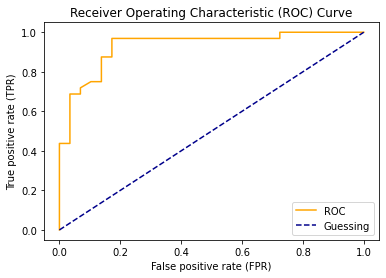

In [9]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
  """
  Plots a ROC curve given the FPR (False Positive Rate)
  and TPR (True Positive Rate)
  """
  # Plot roc curve
  plt.plot(fpr, tpr, color='orange', label='ROC')
  # Plot line with no predictive power (baseline)
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
  
  # Customize the plot
  plt.xlabel('False positive rate (FPR)')
  plt.ylabel('True positive rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()
  
plot_roc_curve(fpr, tpr)

In [10]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_clf, y_probs_positive)

0.9304956896551724

### 3. Confusion Matrix

A confusion matrix is quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

<img src='data/confusion-matrix-diagram.webp'>

In [11]:
from sklearn.metrics import confusion_matrix

y_preds_clf = clf.predict(X_test_clf)
confusion_matrix(y_test_clf, y_preds_clf)

array([[24,  5],
       [ 4, 28]], dtype=int64)

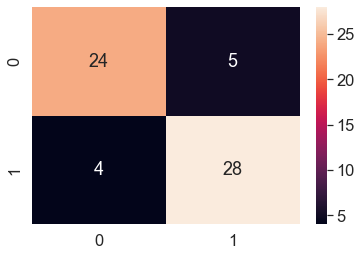

In [12]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test_clf, y_preds_clf)
sns.heatmap(conf_mat, annot=True);

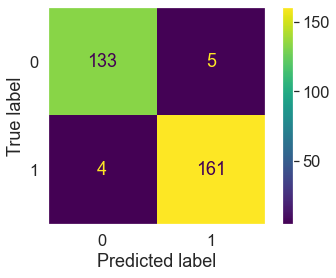

In [13]:
# Make our confusion matrix more visual using a more updated method from Sklearn
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_clf, y=y_clf);
plt.grid(b=None)

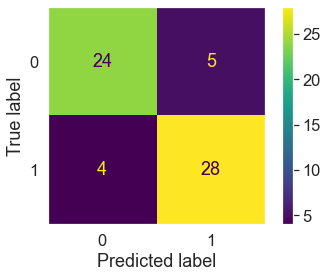

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test_clf, y_preds_clf);
plt.grid(b=None)

### 4. Classification Report

A way to see several different metrics in the same place...
* <b>Precision</b> = indicates proportion of positive identifications (model predicted class 1) which were correct
  * A model with produces no false positives has a precision of 1.0
* <b>Recall</b> = indicates proportion of actual positives which were correctly classified
  * A model with produces no false negatives has a recall of 1.0
* <b>F1 Score</b> = a combination of precision and recall
  * A perfect model achieves an F1 score of 1.0
* <b>Support</b> = number of samples each metric was calculated on
* <b>Accuracy</b> = the accuracy of the model in decimal form
  * Perfect accuracy is equal to 1.0
* <b>Macro Avg</b> = the average precision, recall and F1 score between classes.
  * Macro avg doesn't take class imbalance into account, so if you do have class imbalances, pay attention to this metric
* <b>Weighted Avg</b> = the weighted average of precision, recall, and F1 score between classes
  * Weighted means each metric is calculated with respect to how many samples there are in each class
  * This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test_clf, y_preds_clf))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Which classification metric should you use?
* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labeled 0 or 1)
* AUC/ROC is a good measure to see how well your model is classifying if all classes are balanced
* Precision/Recall become more important when classes are imbalanced
* If false-positive predictions are worse than false-negatives, aim for high precision
* If false-negative predictions are worse than false-positives, aim for higher recall
* F1-score is a good way of combining precision and recall
* A confusion matrix is always a good way to visualize how a classification model is going

## Regression Model Evaluation Metrics

The ones we're going to cover:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 0. Split Data and Fit Model

In [16]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()

# Making dataframe from california housing data
housing = pd.DataFrame(housing_data['data'], columns=housing_data['feature_names'])
housing['MedHouseVal'] = housing_data['target']

In [17]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Split data
X_reg = housing.drop(['MedHouseVal'], axis=1)
y_reg = housing['MedHouseVal']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2)

# Fit regressor to training data
model = RandomForestRegressor()
model.fit(X_train_reg, y_train_reg)

RandomForestRegressor()

### 1. R^2 (Coefficient of Determination)

The proportion of the variation in the dependent variable that is predictable from the independent variable. 

The default `score()` evaluation metric is r^2 for regression algorithm

In [19]:
model.score(X_test_reg, y_test_reg)

0.8065734772187598

### 2. Mean Absolute Error (MAE)

MAE is the average of the absolute differences between predictions and actual y-values.

In [20]:
from sklearn.metrics import mean_absolute_error

y_preds_reg = model.predict(X_test_reg)
mean_absolute_error(y_test_reg, y_preds_reg)

0.32659871732073664

In [21]:
# Deriving the MAE
df = pd.DataFrame(data={'Actual Values': y_test_reg,
                        'Predicted Values': y_preds_reg})

df['Abs Differences'] = abs(df['Predicted Values'] - df['Actual Values'])
df['Abs Differences'].mean()

0.32659871732073803

### 3. Mean Square Error (MSE)

MSE is the average of the square of the absolute differences between predictions and actual y-values.

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_reg, y_preds_reg)

0.2534678520824551

In [23]:
# Deriving the MSE
df['Square Differences'] = df['Abs Differences'] ** 2
df['Square Differences'].mean()

0.25346785208245565

In [24]:
df.head()

,Actual Values,Predicted Values,Abs Differences,Square Differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,0.448240,0.200919


### Which regression metric should you use?
* R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

* MAE gives a better indication of how far off each of your model's predictions are on average
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are)
  * Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off
  * Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off

## Advanced Evaluation Techniques
* Cross validation method
* Cross validation & scoring parameter method - Classification
* Cross validation & scoring parameter method - Regression
* Evaluation metrics as scikit-learn functions

### 1. The Cross Validation Method

This method is where you take several different train/test splits and acquire metrics for each split. This allows you to get a bigger picture idea for how your model will do because since each split is random, the metrics can change based on the split.

<img style="width: 700px;" src="data/cross-validation-img.png">

Cross-validation allows us to get a more accurate metric for evaluating the model because if we just split the data once, we could have gotten lucky and received a higher accuracy than if our model trained/tested on some other data.

In [25]:
# Look above to see how the cross_val_score metric works
# Default is 5 different train/test splits but you can have more
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_clf, y_clf)

array([0.83606557, 0.8852459 , 0.81967213, 0.76666667, 0.8       ])

In [26]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test_clf, y_test_clf)

# Take mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X_clf, y_clf, cv=5))

# Compare the two
print(f'The basic accuracy is: {clf_single_score * 100:.2f}%')
print(f'The cross-validated accuracy is: {np.mean(clf_cross_val_score) * 100:.2f}%')

The basic accuracy is: 85.25%
The cross-validated accuracy is: 82.48%


### 2. Cross Validation & Scoring Parameter Method - Classification

By default, the cross validation method uses the accuracy metric

In [27]:
np.random.seed(42)
cross_val_score(clf, X_clf, y_clf, cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

However, using the scoring parameter, you can also get other metrics

In [28]:
# Precision

np.random.seed(42)
clf_cross_precision = cross_val_score(clf, X_clf, y_clf, cv=5, scoring='precision')
clf_cross_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [29]:
print(f'The cross-validated precision is: {np.mean(clf_cross_precision)}')

The cross-validated precision is: 0.8329547346025924


In [30]:
# Recall

np.random.seed(42)
clf_cross_recall = cross_val_score(clf, X_clf, y_clf, cv=5, scoring='recall')
clf_cross_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [31]:
print(f'The cross-validated recall is: {np.mean(clf_cross_recall)}')

The cross-validated recall is: 0.8545454545454545


### 3. Cross Validation & Scoring Parameter Method - Regression

By default, the cross validation method uses the r^2 metric

In [32]:
# Used cv=3 to save time
np.random.seed(42)
reg_cross_val_score = cross_val_score(model, X_reg, y_reg, cv=3)
reg_cross_val_score

array([0.62156985, 0.72075819, 0.62130937])

In [33]:
np.mean(reg_cross_val_score)

0.6545458023124507

But like classification, we can also use other metrics by using the scoring parameter

In [34]:
# Mean absolute error
# Read documentation for why these values are intentionally made negative (nothing is going wrong)
  # The mae values are just negated, so the first split has an mae value of 0.52

reg_cross_val_mae = cross_val_score(model, X_reg, y_reg, cv=3, scoring='neg_mean_absolute_error')
reg_cross_val_mae

array([-0.52258481, -0.424984  , -0.50667074])

In [35]:
# Mean squared error
# Read documentation for why these values are intentionally made negative (nothing is going wrong)
  # The mse values are just negated, so the first split has an mae value of 0.51

reg_cross_val_mse = cross_val_score(model, X_reg, y_reg, cv=3, scoring='neg_mean_squared_error')
reg_cross_val_mse

array([-0.51325643, -0.32925916, -0.54118007])

### Evaluation Metrics as Scikit-Learn Functions

Evaluating scikit-learn machine learning models using the `sklearn.metrics` module
* These are different from cross validation metrics because these are only on one split

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test_clf, y_preds_clf)*100:.2f}%')
print(f'Precision: {precision_score(y_test_clf, y_preds_clf)}')
print(f'Recall: {recall_score(y_test_clf, y_preds_clf)}')
print(f'F1 Score: {f1_score(y_test_clf, y_preds_clf)}')

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384615


In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('Regression model metrics on the test set')
print(f'R^2: {r2_score(y_test_reg, y_preds_reg)}')
print(f'MAE: {mean_absolute_error(y_test_reg, y_preds_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_preds_reg)}')

Regression model metrics on the test set
R^2: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551
